### Print barchart with number languages transled items

In [1]:
import time

start_time = time.time()

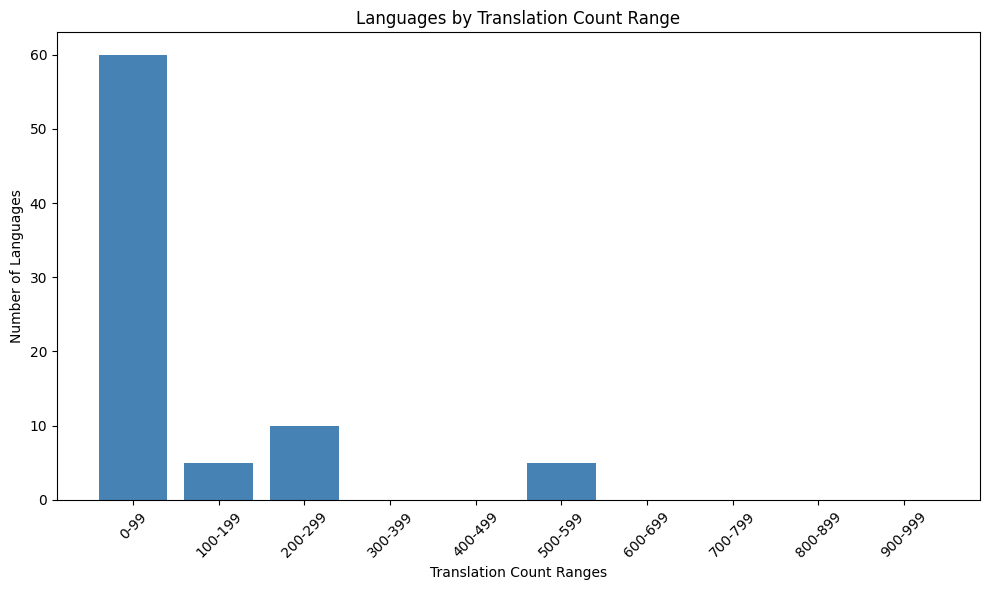

In [2]:
# pip install sparqlwrapper
from SPARQLWrapper import SPARQLWrapper, JSON
import sys
import matplotlib.pyplot as plt

# --- Step 1: SPARQL Query ---
endpoint_url = "https://query.wikidata.org/sparql"
query = """
SELECT ?lang (COUNT(?item) AS ?count) WHERE {
  ?item wdt:P6104 wd:Q134294510 .
  ?item rdfs:label ?label .
  BIND(LANG(?label) AS ?lang)
}
GROUP BY ?lang
ORDER BY DESC(?count)
"""

def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

# --- Step 2: Extract Data ---
results = get_results(endpoint_url, query)

language_data = [
    (entry["lang"]["value"], int(entry["count"]["value"]))
    for entry in results["results"]["bindings"]
]

# --- Step 3: Bucket Counts ---
bucket_edges = list(range(0, 1001, 100))  # 0–1000 range
bucket_labels = [f"{start}-{start + 99}" for start in bucket_edges[:-1]]
bucket_counts = [0] * len(bucket_labels)

for lang, count in language_data:
    for i in range(len(bucket_edges) - 1):
        if bucket_edges[i] <= count < bucket_edges[i + 1]:
            bucket_counts[i] += 1
            break

# --- Step 4: Plot ---
plt.figure(figsize=(10, 6))
plt.bar(bucket_labels, bucket_counts, color='steelblue')
plt.xlabel('Translation Count Ranges')
plt.ylabel('Number of Languages')
plt.title('Languages by Translation Count Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
language_data

[('sv', 587),
 ('en', 586),
 ('fr', 583),
 ('de', 581),
 ('da', 579),
 ('fi', 268),
 ('nl', 267),
 ('pt', 264),
 ('pl', 260),
 ('ru', 256),
 ('es', 255),
 ('zh', 255),
 ('fa', 250),
 ('nn', 245),
 ('it', 237),
 ('ku', 191),
 ('uk', 186),
 ('ja', 172),
 ('ar', 163),
 ('nb', 139),
 ('sma', 98),
 ('fit', 97),
 ('rmy', 96),
 ('sje', 96),
 ('sju', 96),
 ('yi', 96),
 ('tr', 95),
 ('cs', 95),
 ('ko', 94),
 ('id', 94),
 ('hu', 93),
 ('hi', 93),
 ('th', 93),
 ('lt', 73),
 ('smj', 60),
 ('ro', 57),
 ('sw', 50),
 ('bn', 49),
 ('et', 49),
 ('se', 49),
 ('ka', 48),
 ('az', 48),
 ('gl', 48),
 ('he', 48),
 ('lv', 47),
 ('vi', 47),
 ('ms', 46),
 ('el', 44),
 ('sms', 41),
 ('mul', 27),
 ('ceb', 21),
 ('fo', 10),
 ('is', 10),
 ('sl', 10),
 ('ca', 6),
 ('nds', 6),
 ('bg', 4),
 ('ga', 4),
 ('eo', 2),
 ('mk', 2),
 ('sr', 2),
 ('zh-hans', 2),
 ('zh-hant', 2),
 ('de-ch', 2),
 ('en-ca', 2),
 ('en-gb', 2),
 ('ast', 1),
 ('bar', 1),
 ('be', 1),
 ('be-tarask', 1),
 ('br', 1),
 ('cy', 1),
 ('eu', 1),
 ('hr', 1),


### Languges most translated

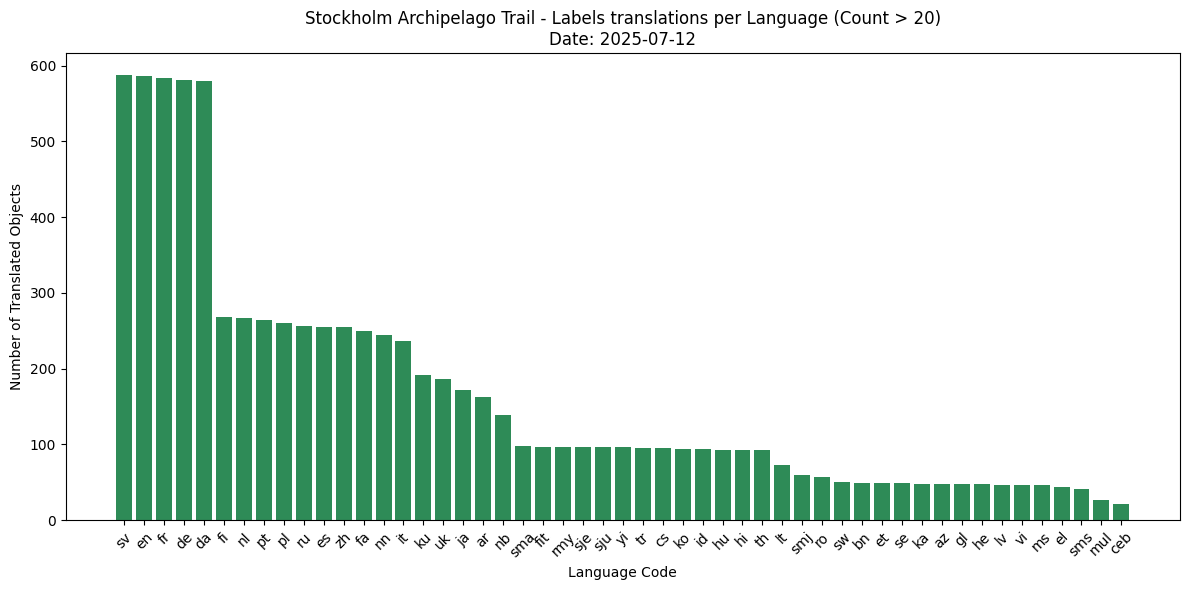

In [4]:
from datetime import datetime

# Split data into two groups
high_counts = [(lang, count) for lang, count in language_data if count > 20]
low_counts = [(lang, count) for lang, count in language_data if count <= 20]

# Get today's date
from datetime import datetime
today_str = datetime.today().strftime('%Y-%m-%d')

# --------- Plot for high counts ---------
langs_high, counts_high = zip(*high_counts)

plt.figure(figsize=(12, 6))
plt.bar(langs_high, counts_high, color='seagreen')
plt.xlabel('Language Code')
plt.ylabel('Number of Translated Objects')
plt.title(f'Stockholm Archipelago Trail - Labels translations per Language (Count > 20)\nDate: {today_str}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

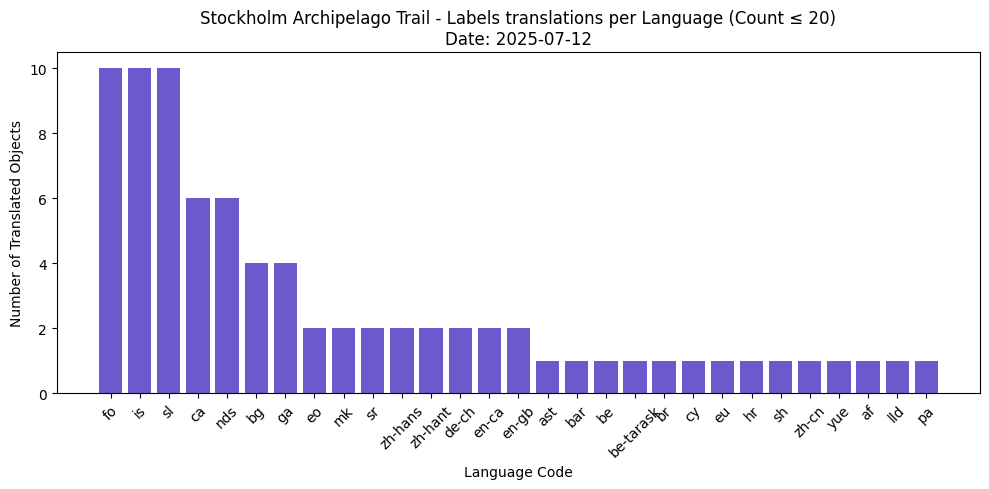

In [5]:
langs_low, counts_low = zip(*low_counts)

plt.figure(figsize=(10, 5))
plt.bar(langs_low, counts_low, color='slateblue')
plt.xlabel('Language Code')
plt.ylabel('Number of Translated Objects')
plt.title(f'Stockholm Archipelago Trail - Labels translations per Language (Count ≤ 20)\nDate: {today_str}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Add colors to explain 
1) Official langiuages in Sweden  
2) Nordic Languages   
3) European languages 

In [6]:
# Official languages in Sweden
swedish_official = {'sv', 'fi', 'se', 'me', 'ri', 'sm','fit'}  # Swedish, Finnish, Sámi varieties, Meänkieli, Romani, Yiddish

# Nordic languages (including official Swedish ones)
nordic_languages = swedish_official.union({'da', 'no', 'nn', 'is', 'fo'})  # Danish, Norwegian, Icelandic, 

# European languages (sample — expand as needed)
european_languages = {
    'en', 'fr', 'de', 'es', 'it', 'pt', 'pl', 'nl', 'cs', 'hu', 'ro',
    'bg', 'el', 'tr', 'et', 'lv', 'lt', 'sk', 'sl', 'hr', 'mt',
    'da', 'fi', 'sv', 'no', 'is'
}  


In [7]:
def assign_color(lang):
    if lang in swedish_official:
        return 'seagreen'       # official Swedish languages - green
    elif lang in nordic_languages:
        return 'royalblue'      # other Nordic languages - blue
    elif lang in european_languages:
        return 'gray'           # other European languages - gray
    else:
        return 'lightcoral'     # everything else - coral/red


In [8]:
langs, counts = zip(*language_data)


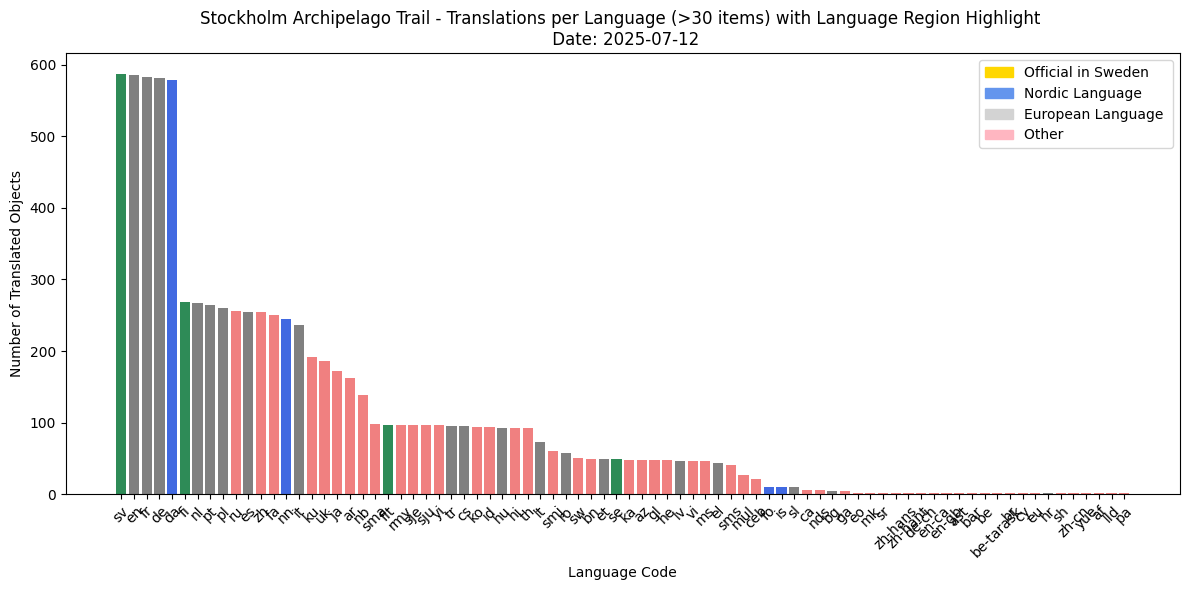

In [9]:
colors = [assign_color(lang) for lang in langs]
plt.figure(figsize=(12, 6))
bars = plt.bar(langs, counts, color=colors)
plt.xlabel('Language Code')
plt.ylabel('Number of Translated Objects')
plt.title(f'Stockholm Archipelago Trail - Translations per Language (>30 items) with Language Region Highlight \n Date: {today_str}')
plt.xticks(rotation=45)
plt.tight_layout()

# Legend
import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color='gold', label='Official in Sweden '),
    mpatches.Patch(color='cornflowerblue', label='Nordic Language '),
    mpatches.Patch(color='lightgray', label='European Language '),
    mpatches.Patch(color='lightpink', label='Other ')
]
plt.legend(handles=legend_patches)

plt.show()


### Top spoken languages in Sweden

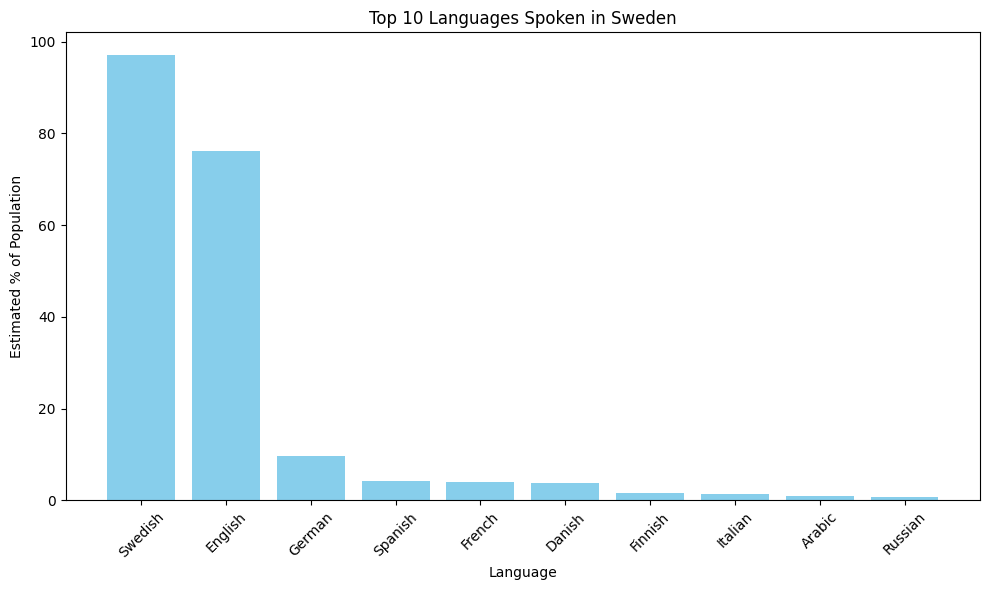

In [10]:
import matplotlib.pyplot as plt

languages = ['Swedish', 'English', 'German', 'Spanish', 'French', 'Danish', 'Finnish', 'Italian', 'Arabic', 'Russian']
percentages = [97.2, 76.2, 9.7, 4.3, 4.1, 3.7, 1.5, 1.3, 1.0, 0.7]

plt.figure(figsize=(10, 6))
plt.bar(languages, percentages, color='skyblue')
plt.xlabel('Language')
plt.ylabel('Estimated % of Population')
plt.title('Top 10 Languages Spoken in Sweden')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


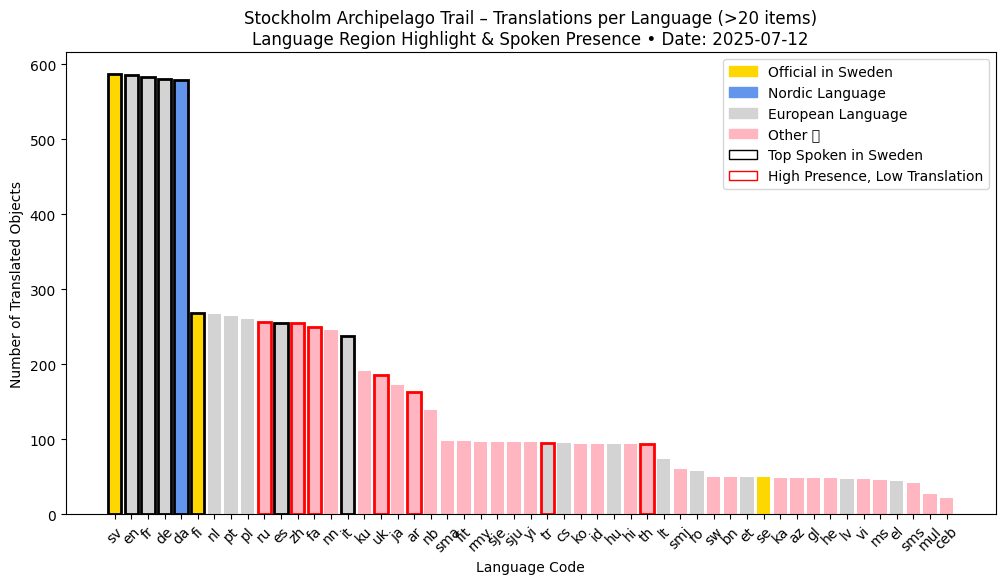

In [11]:
from SPARQLWrapper import SPARQLWrapper, JSON
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import sys

# --- Step 1: SPARQL Query ---
endpoint_url = "https://query.wikidata.org/sparql"
query = """
SELECT ?lang (COUNT(?item) AS ?count) WHERE {
  ?item wdt:P6104 wd:Q134294510 .
  ?item rdfs:label ?label .
  BIND(LANG(?label) AS ?lang)
}
GROUP BY ?lang
ORDER BY DESC(?count)
"""

def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

results = get_results(endpoint_url, query)

# --- Step 2: Extract and Filter Language Data ---
language_data = [
    (entry["lang"]["value"], int(entry["count"]["value"]))
    for entry in results["results"]["bindings"]
]
filtered_data = [(lang, count) for lang, count in language_data if count > 20]
filtered_data.sort(key=lambda x: x[1], reverse=True)
langs = [lang for lang, _ in filtered_data]
counts = [count for _, count in filtered_data]

# --- Step 3: Define Language Groups ---
swedish_official = {'sv', 'fi', 'se', 'me', 'ri', 'sm'}
nordic_languages = swedish_official.union({'da', 'no', 'is'})
european_languages = {
    'en','fr','de','es','it','pt','pl','nl','cs','hu','ro','bg','el','tr',
    'et','lv','lt','sk','sl','hr','mt','da','fi','sv','no','is'
}
top_spoken_languages = {'sv', 'en', 'de', 'es', 'fr', 'da', 'fi', 'it', 'ar', 'ru'}
high_presence_low_translation = {'ar', 'so', 'fa', 'tr', 'th', 'zh', 'ru', 'uk'}

def assign_color(lang):
    if lang in swedish_official:
        return 'gold'
    elif lang in nordic_languages:
        return 'cornflowerblue'
    elif lang in european_languages:
        return 'lightgray'
    else:
        return 'lightpink'

colors = [assign_color(lang) for lang in langs]

# --- Step 4: Generate Chart ---
today_str = datetime.today().strftime('%Y-%m-%d')
plt.figure(figsize=(12, 6))
bars = plt.bar(langs, counts, color=colors)
plt.xlabel('Language Code')
plt.ylabel('Number of Translated Objects')
plt.title(f'Stockholm Archipelago Trail – Translations per Language (>20 items)\nLanguage Region Highlight & Spoken Presence • Date: {today_str}')
plt.xticks(rotation=45)

# --- Step 5: Apply Borders for Highlights ---
for bar, lang in zip(bars, langs):
    if lang in top_spoken_languages:
        bar.set_edgecolor('black')
        bar.set_linewidth(2)
    if lang in high_presence_low_translation:
        bar.set_edgecolor('red')
        bar.set_linewidth(2)

# --- Step 6: Legend ---
legend_patches = [
    mpatches.Patch(color='gold', label='Official in Sweden'),
    mpatches.Patch(color='cornflowerblue', label='Nordic Language'),
    mpatches.Patch(color='lightgray', label='European Language'),
    mpatches.Patch(color='lightpink', label='Other 🌐'),
    mpatches.Patch(edgecolor='black', facecolor='white', label='Top Spoken in Sweden'),
    mpatches.Patch(edgecolor='red', facecolor='white', label='High Presence, Low Translation')
]
plt.legend(handles=legend_patches, loc='upper right')
#plt.tight_layout()
plt.show()


## Just show High presence languages

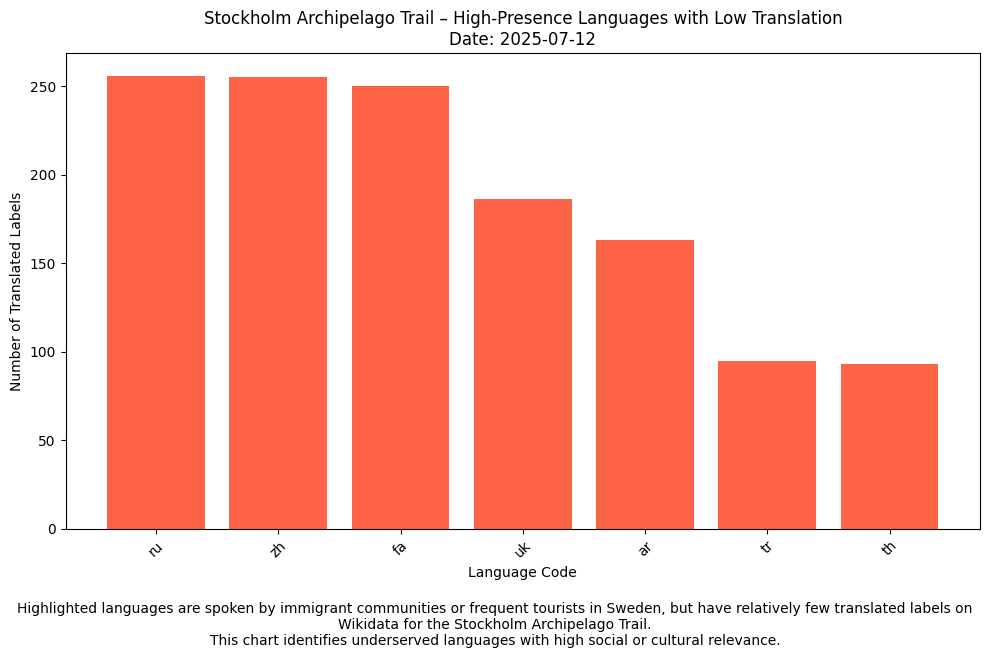

In [12]:
high_presence_langs = {'ar', 'so', 'fa', 'tr', 'th', 'zh', 'ru', 'uk'}
# Filter original data to include only high-presence languages
highlighted_data = [(lang, count) for lang, count in language_data if lang in high_presence_langs]

# Sort for readability
highlighted_data.sort(key=lambda x: x[1], reverse=True)
langs = [lang for lang, _ in highlighted_data]
counts = [count for _, count in highlighted_data]

# Plot
from datetime import datetime
today_str = datetime.today().strftime('%Y-%m-%d')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(langs, counts, color='tomato')
plt.xlabel('Language Code')
plt.ylabel('Number of Translated Labels')
plt.title(f'Stockholm Archipelago Trail – High-Presence Languages with Low Translation\nDate: {today_str}')
plt.xticks(rotation=45)
plt.tight_layout()

explanation = (
    "Highlighted languages are spoken by immigrant communities or frequent tourists in Sweden, "
    "but have relatively few translated labels on Wikidata for the Stockholm Archipelago Trail.\n"
    "This chart identifies underserved languages with high social or cultural relevance."
)

# Add explanation as text on the plot
plt.figtext(0.5, -0.08, explanation, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

## Labels translated per instances

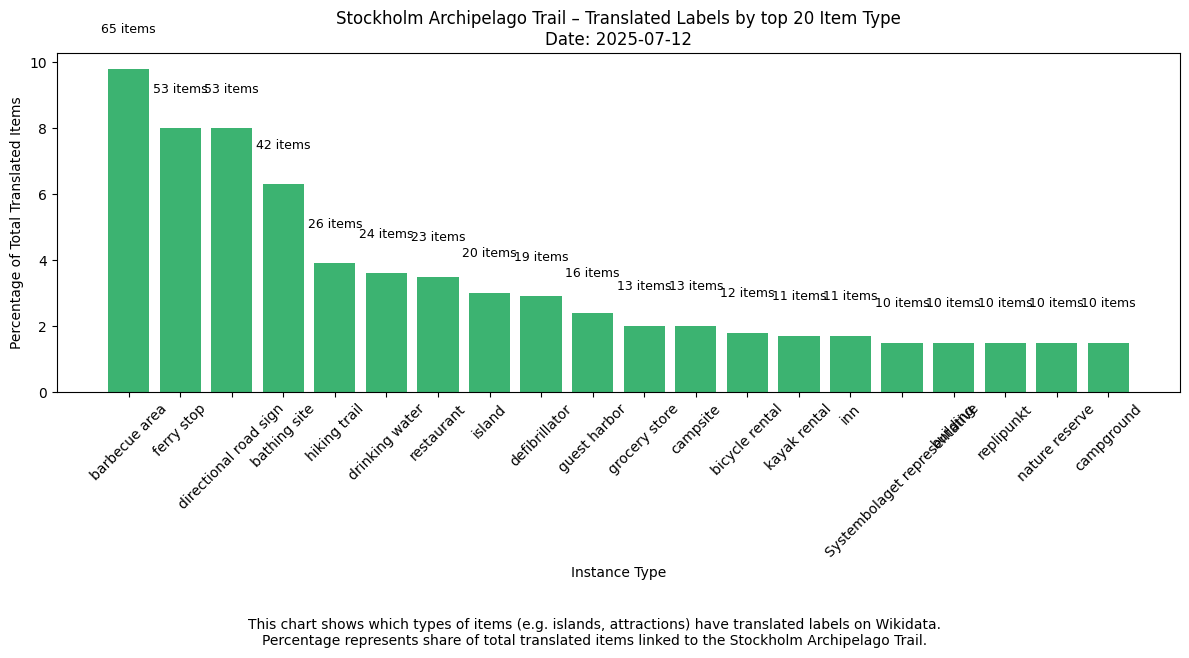

In [13]:
from SPARQLWrapper import SPARQLWrapper, JSON
import matplotlib.pyplot as plt
from datetime import datetime
import sys

# --- Step 1: SPARQL Query ---
endpoint_url = "https://query.wikidata.org/sparql"
query = """
SELECT ?typeLabel (COUNT(?item) AS ?count) WHERE {
  ?item wdt:P6104 wd:Q134294510 .
  ?item wdt:P31 ?type .
  ?item rdfs:label ?label .
  FILTER(LANG(?label) != "")
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?typeLabel
ORDER BY DESC(?count)
"""
query = """SELECT ?typeLabel (COUNT(DISTINCT ?item) AS ?count) WHERE {
  ?item wdt:P6104 wd:Q134294510 .
  ?item wdt:P31 ?type .
  ?item rdfs:label ?label .
  FILTER(LANG(?label) != "")
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?typeLabel
ORDER BY DESC(?count)
"""

def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

results = get_results(endpoint_url, query)

# --- Step 2: Extract and Process Data ---
raw_data = [
    (entry["typeLabel"]["value"], int(entry["count"]["value"]))
    for entry in results["results"]["bindings"]
]

total_translations = sum([count for _, count in raw_data])

# Add percentages
type_data = [
    (label, count, round((count / total_translations) * 100, 1))
    for label, count in raw_data
]

# Keep only top 20 instance types
type_data = type_data[:20] 
# Sort for readability
type_data.sort(key=lambda x: x[1], reverse=True)

labels = [label for label, _, _ in type_data]
counts = [count for _, count, _ in type_data]
percentages = [pct for _, _, pct in type_data]

# --- Step 3: Plot Chart ---
today_str = datetime.today().strftime('%Y-%m-%d')
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, percentages, color='mediumseagreen')
plt.xlabel('Instance Type')
plt.ylabel('Percentage of Total Translated Items')
plt.title(f'Stockholm Archipelago Trail – Translated Labels by top 20 Item Type\nDate: {today_str}')
plt.xticks(rotation=45)

# Annotate each bar with actual count
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{count} items", ha='center', va='bottom', fontsize=9)

# Optional explanatory footer
explanation = (
    "This chart shows which types of items (e.g. islands, attractions) have translated labels on Wikidata.\n"
    "Percentage represents share of total translated items linked to the Stockholm Archipelago Trail."
)
plt.figtext(0.5, -0.08, explanation, wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()


In [14]:
end_time = time.time()
elapsed = end_time - start_time

now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(f"[{now}] Elapsed time: {elapsed:.4f} seconds")

[2025-07-12 10:32:51] Elapsed time: 1.8158 seconds
